In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Dataset Description

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

#EDA - Data cleaning and Data Visualization

In [ ]:
columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Galzing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df.columns = columns

In [ ]:
# Checking for null values
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Galzing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [ ]:
# Data description

df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Galzing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Galzing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


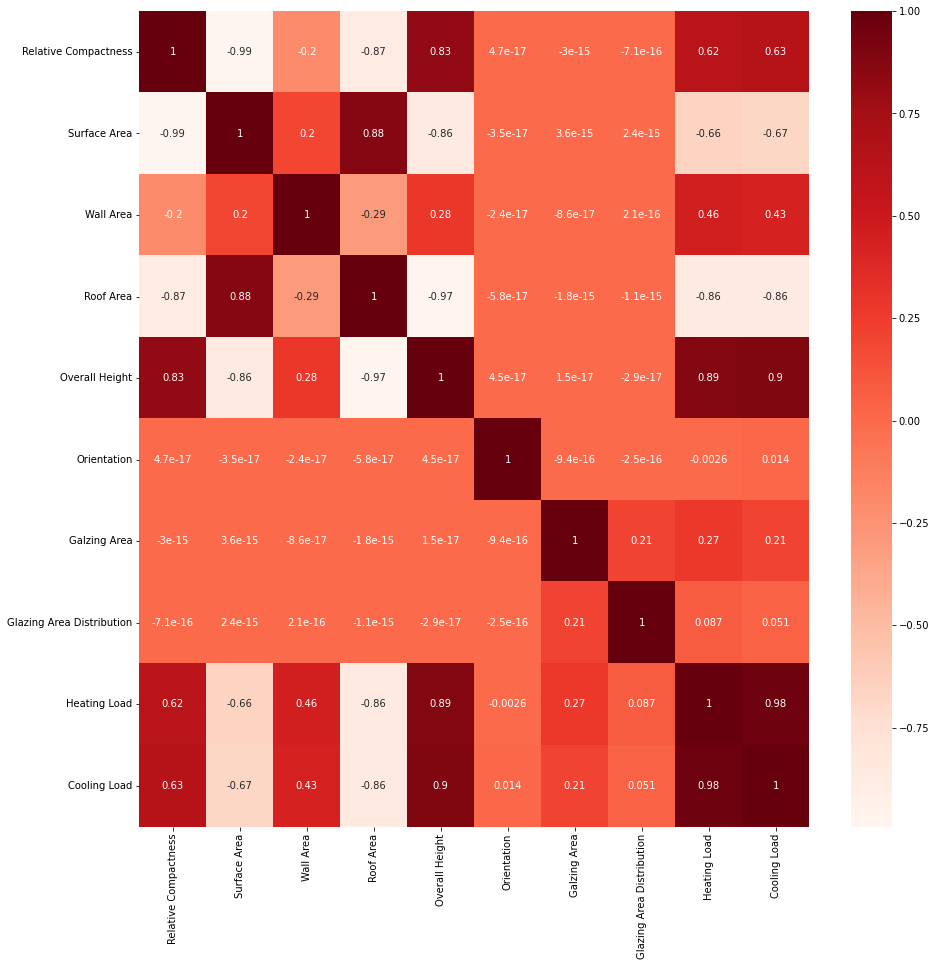

In [ ]:
# corelation matrix
corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

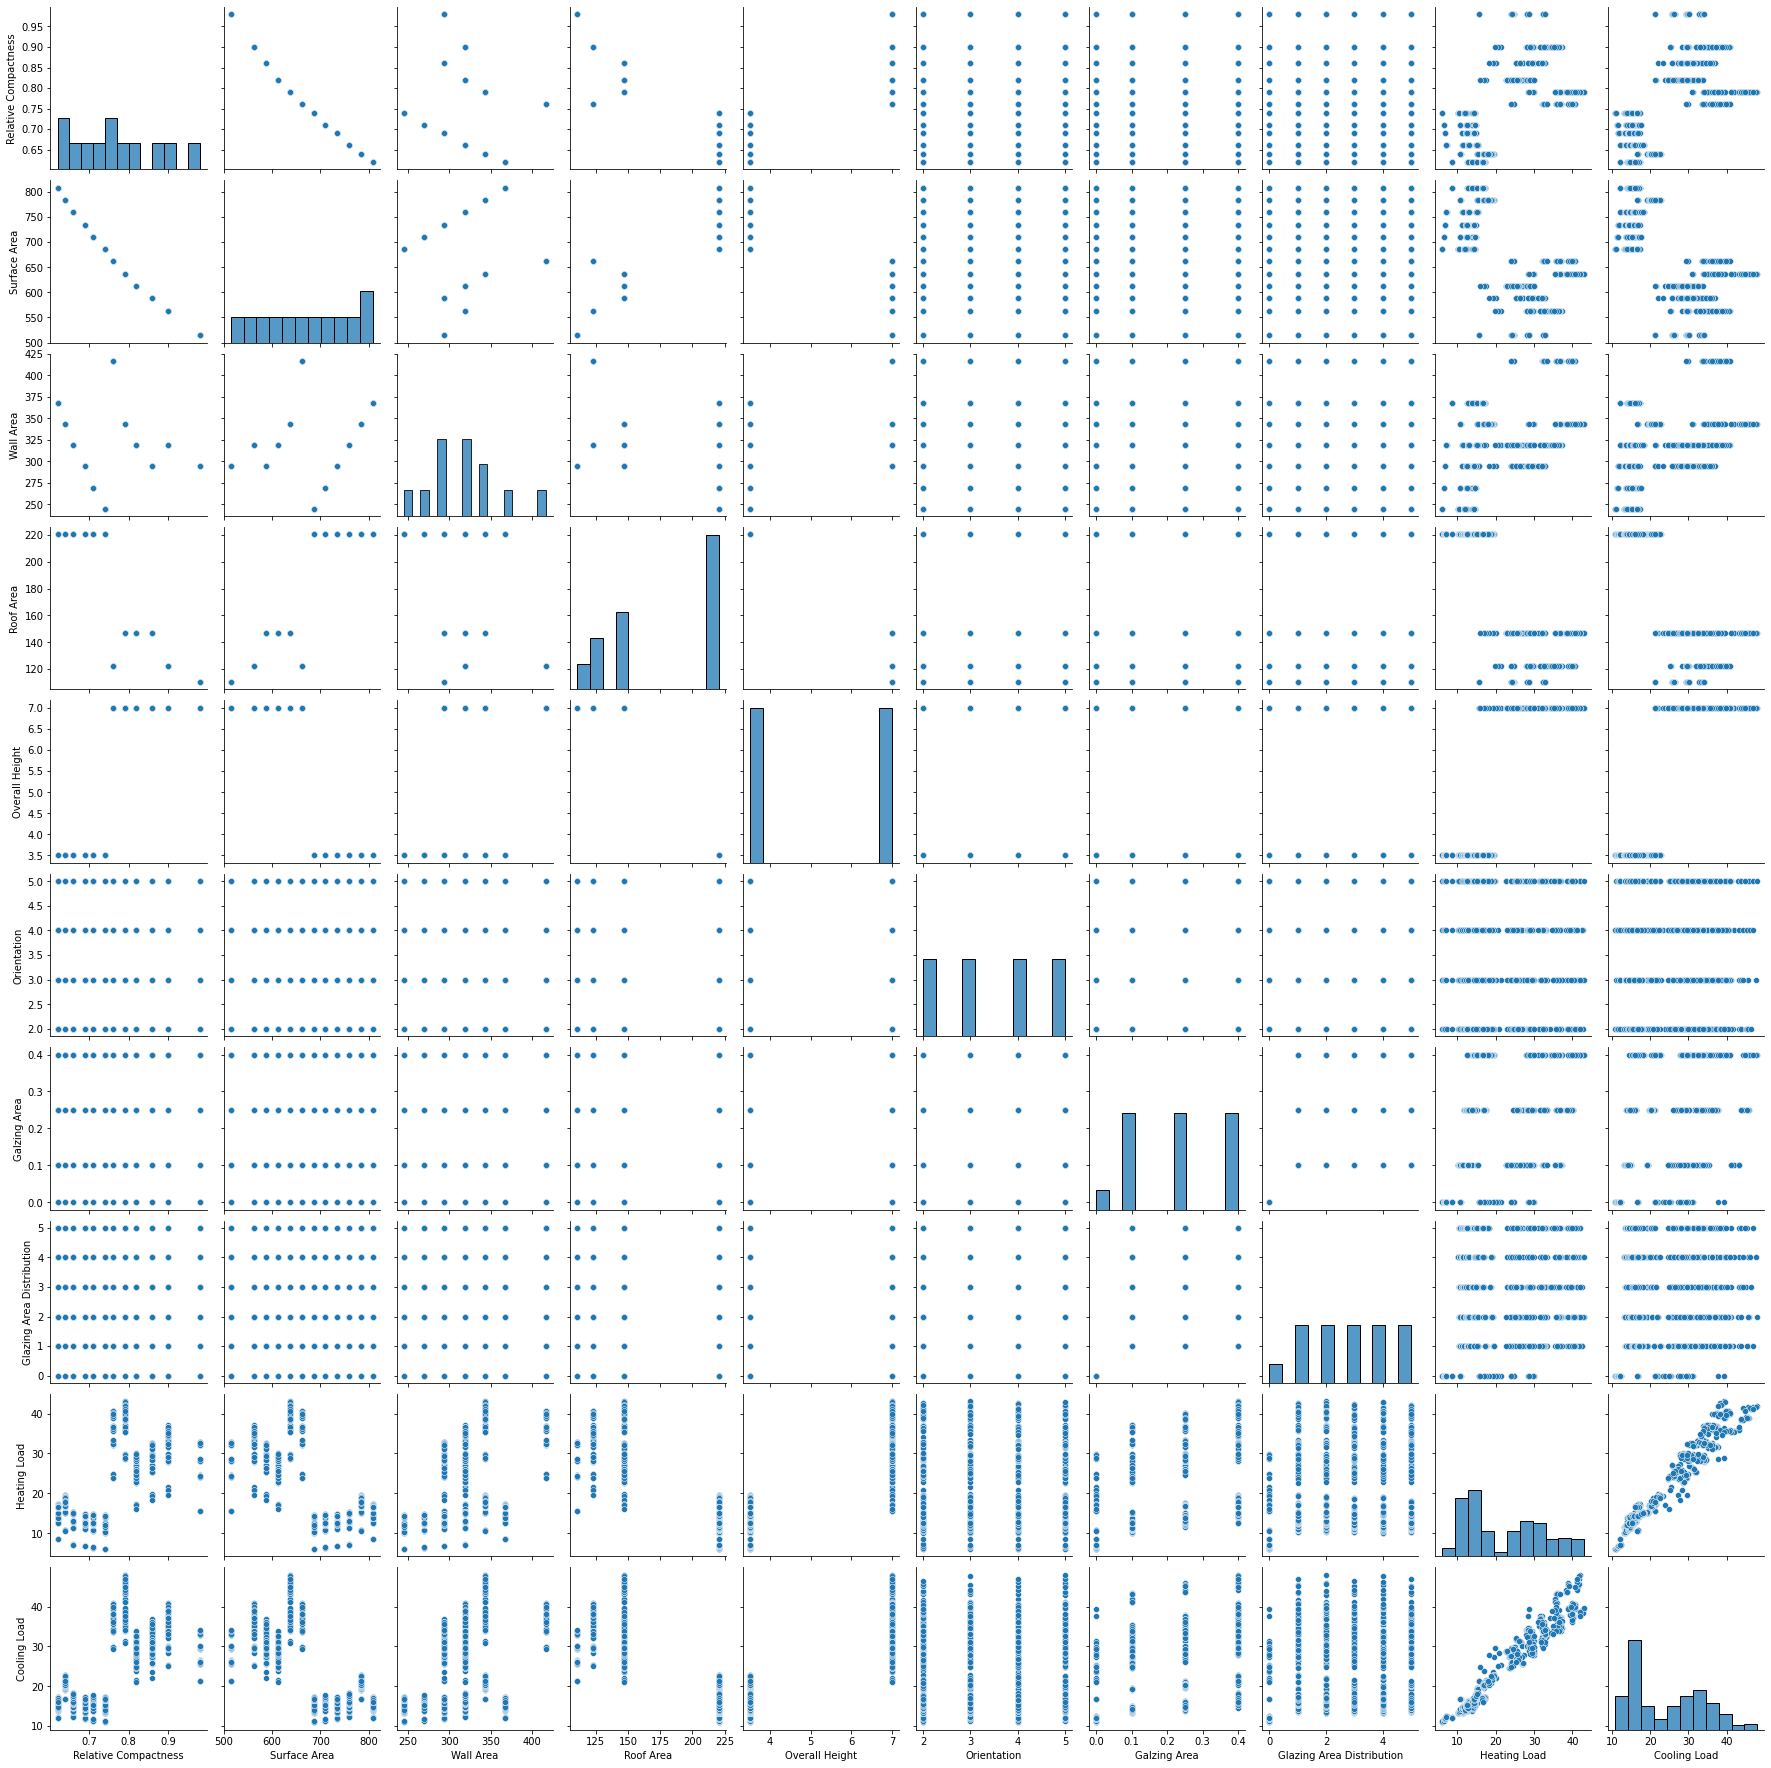

In [ ]:
# pair plot

sns.pairplot(df)

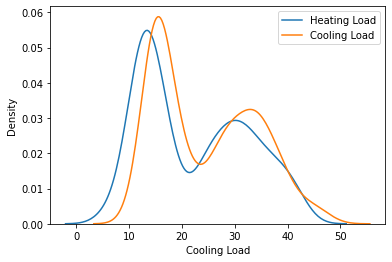

In [ ]:
# coorelation between target variables using dist plot

sns.distplot(df['Heating Load'], hist=False)
sns.distplot(df['Cooling Load'], hist=False)
plt.legend(['Heating Load', 'Cooling Load'])
plt.show()

The above distribution plot shows a high correlation between the two target variables.

In [ ]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Galzing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Modeling

In [ ]:
X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
y1 = df['Heating Load']
y2 = df['Cooling Load']

#### Prediction

In [ ]:
X_train_heating, X_test_heating, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)
X_train_cooling, X_test_cooling, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3, random_state = 42)

In [ ]:
# Model function
def reg(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_pred, y_test)
  return r2

# Linear Regression
r2_lr = reg(LinearRegression(), X_train_heating, y1_train, X_test_heating, y1_test)
r2_lr_cooling = reg(LinearRegression(), X_train_cooling, y2_train, X_test_cooling, y2_test)
r2_ridge = reg(Ridge(alpha = 0.01), X_train_heating, y1_train, X_test_heating, y1_test)
r2_lasso = reg(Lasso(alpha = 0.01), X_train_heating, y1_train, X_test_heating, y1_test)

print(r2_lr, r2_lr_cooling, r2_ridge, r2_lasso)

0.9038896976499194 0.8690587082373609 0.903807116770862 0.8989871546343928


In [ ]:
# Hyper parameter tuning for ridge and lasso for best alpha using GridSearchCV

def ridge_hyper(X_train, y_train):
  folds = KFold(n_splits = 5, shuffle=True, random_state = 42)
  params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]}
  model = Ridge()
  model_cv = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = folds, return_train_score=True, verbose = 1)
  model_cv.fit(X_train, y_train)
  hyper_params = model_cv.best_params_
  return hyper_params

best_ridge_heating_params = ridge_hyper(X_train_heating, y1_train)
best_ridge_cooling_params = ridge_hyper(X_train_cooling, y2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
r2_ridge_hyper = reg(Ridge(alpha = best_ridge_heating_params['alpha']), X_train_heating, y1_train, X_test_heating, y1_test)
r2_ridge_hyper_cooling = reg(Ridge(alpha = best_ridge_cooling_params['alpha']), X_train_cooling, y2_train, X_test_cooling, y2_test)
print(r2_ridge_hyper, r2_ridge_hyper_cooling)

0.9039606490532225 0.8693052358267618


In [ ]:
# Lasso hyperparameter tuning

# Hyper parameter tuning for ridge and lasso for best alpha using GridSearchCV
def lasso_hyper(X_train, y_train):
  folds = KFold(n_splits = 5, shuffle=True, random_state = 42)
  params = {'alpha': [0.001, 0.1, 1.0, 5.0, 10.0, 20.0]}
  model = Lasso()
  model_cv = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = folds, return_train_score=True, verbose = 1)
  model_cv.fit(X_train, y_train)
  hyper_params = model_cv.best_params_
  return hyper_params

best_lasso_heating_params = lasso_hyper(X_train_heating, y1_train)
best_lasso_cooling_params = lasso_hyper(X_train_cooling, y2_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
r2_lasso_hyper = reg(Lasso(alpha = best_lasso_heating_params['alpha']), X_train_heating, y1_train, X_test_heating, y1_test)
r2_lasso_hyper_cooling = reg(Lasso(alpha = best_lasso_cooling_params['alpha']), X_train_cooling, y2_train, X_test_cooling, y2_test)
print(r2_lasso_hyper, r2_lasso_hyper_cooling)

0.9037819681511523 0.8692157550845192


In [ ]:
# Decision tree with GridSearchCV

def tree_hyper(X_train, y_train):
  
  # Setup the parameters for the decision tree.

  param = {"splitter":['best', 'random'],
          "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
          "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9],
          "min_weight_fraction_leaf":[0.1, 0.2, 0.3, 0.4, 0.5],
          "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
          }

  # Instansiate Decision Tree
  tree = DecisionTreeRegressor()

  # Instansiate Grid Search cv
  tree_cv = GridSearchCV(tree, param_grid = param, cv=5, scoring = 'r2')

  tree_cv.fit(X_train, y_train)

  hyper_params = tree_cv.best_params_
  return hyper_params
  
best_tree_heating_params = tree_hyper(X_train_heating, y1_train)
best_tree_cooling_params = tree_hyper(X_train_cooling, y2_train)

In [ ]:
print(best_tree_heating_params)
print(best_tree_cooling_params)

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [ ]:
r2_dtree = reg(DecisionTreeRegressor(splitter = best_tree_heating_params['splitter'], 
                                     max_depth = best_tree_heating_params['max_depth'], 
                                     max_features = best_tree_heating_params['max_features'],
                                     min_weight_fraction_leaf = best_tree_heating_params['min_weight_fraction_leaf'], 
                                     min_samples_leaf = best_tree_heating_params['min_samples_leaf']),  X_train_heating, y1_train, X_test_heating, y1_test)

r2_dtree_cooling = reg(DecisionTreeRegressor(splitter = best_tree_cooling_params['splitter'], 
                                     max_depth = best_tree_cooling_params['max_depth'], 
                                     max_features = best_tree_cooling_params['max_features'],
                                     min_weight_fraction_leaf = best_tree_cooling_params['min_weight_fraction_leaf'], 
                                     min_samples_leaf = best_tree_cooling_params['min_samples_leaf']),  X_train_cooling, y2_train, X_test_cooling, y2_test)

print(r2_dtree, r2_dtree_cooling)

0.9174963447362772 0.8488790253922394


In [ ]:
# RandomForest with GridSearchCV
def ensemble_hyper(X_train, y_train):
# Setup the parameters for the random forest.
  
  param = {"n_estimators": [50, 100, 150, 200, 250, 300],
          "max_features":['auto', 'sqrt', 'log2'],
          "max_depth":range(1, 10)}

  # Instansiate RandomForest
  rf = RandomForestRegressor()

  # Instansiate Grid Search cv
  rf_cv = GridSearchCV(rf, param_grid = param, cv=5, scoring = 'r2')
  rf_cv.fit(X_train, y_train)
  hyper_params = rf_cv.best_params_
  return hyper_params
  
rf_heating_params = ensemble_hyper(X_train_heating, y1_train)
rf_cooling_params = ensemble_hyper(X_train_cooling, y2_train)

In [ ]:
print(rf_heating_params)
print(rf_cooling_params)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
r2_rf = reg(RandomForestRegressor(n_estimators = rf_heating_params['n_estimators'], 
                                  max_depth = rf_heating_params['max_depth'], 
                                  max_features = rf_heating_params['max_features']),  X_train_heating, y1_train, X_test_heating, y1_test)

r2_rf_cooling = reg(RandomForestRegressor(n_estimators = rf_cooling_params['n_estimators'], 
                                  max_depth = rf_cooling_params['max_depth'], 
                                  max_features = rf_cooling_params['max_features']),  X_train_cooling, y2_train, X_test_cooling, y2_test)

print(r2_rf, r2_rf_cooling)

0.9977347433735321 0.9707288035289646


#### Prediction table

In [ ]:
Heating_load_model_score = {'Linear Regression': r2_lr,
                      'Ridge Regression': r2_ridge_hyper,
                      'Lasso Regression': r2_lasso_hyper,
                      'Decision Tree': r2_dtree,
                      'Random Forest': r2_rf}

Cooling_load_model_score = {'Linear Regression': r2_lr_cooling,
                      'Ridge Regression': r2_ridge_hyper_cooling,
                      'Lasso Regression': r2_lasso_hyper_cooling,
                      'Decision Tree': r2_dtree_cooling,
                      'Random Forest': r2_rf_cooling}

In [ ]:
Heating_model = list(Heating_load_model_score.keys())
Heating_model_score = list(Heating_load_model_score.values())

Cooling_model = list(Cooling_load_model_score.keys())
Cooling_model_score = list(Cooling_load_model_score.values())

In [ ]:
from tabulate import tabulate
table = [['Model','Score']]
for i in range(len(Heating_load_model_score)):
    table.append([Heating_model[i],Heating_model_score[i]])
print('HEATING LOAD - TEST SET PREDICTION SCORE')
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

HEATING LOAD - TEST SET PREDICTION SCORE
╒═══════════════════╤══════════╕
│ Model             │    Score │
╞═══════════════════╪══════════╡
│ Linear Regression │ 0.90389  │
├───────────────────┼──────────┤
│ Ridge Regression  │ 0.903961 │
├───────────────────┼──────────┤
│ Lasso Regression  │ 0.903782 │
├───────────────────┼──────────┤
│ Decision Tree     │ 0.917496 │
├───────────────────┼──────────┤
│ Random Forest     │ 0.997735 │
╘═══════════════════╧══════════╛


In [ ]:
from tabulate import tabulate
table = [['Model','Score']]
for i in range(len(Cooling_load_model_score)):
    table.append([Cooling_model[i],Cooling_model_score[i]])
print('COOLING LOAD - TEST SET PREDICTION SCORE')
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

COOLING LOAD - TEST SET PREDICTION SCORE
╒═══════════════════╤══════════╕
│ Model             │    Score │
╞═══════════════════╪══════════╡
│ Linear Regression │ 0.869059 │
├───────────────────┼──────────┤
│ Ridge Regression  │ 0.869305 │
├───────────────────┼──────────┤
│ Lasso Regression  │ 0.869216 │
├───────────────────┼──────────┤
│ Decision Tree     │ 0.848879 │
├───────────────────┼──────────┤
│ Random Forest     │ 0.970729 │
╘═══════════════════╧══════════╛


#### Saving both heating and cooling models

We can see that RandomForest has given good r2 score compared to other models. So, we shall save the model with RandomForestRegressor with the best parameters.

In [ ]:
import pickle

In [ ]:
heating_model = RandomForestRegressor(n_estimators = rf_heating_params['n_estimators'], 
                                  max_depth = rf_heating_params['max_depth'], 
                                  max_features = rf_heating_params['max_features'])
heating_model.fit(X_train_heating, y1_train)
pickle.dump(heating_model, open('heating_model.pkl', 'wb'))

In [ ]:
cooling_model = RandomForestRegressor(n_estimators = rf_cooling_params['n_estimators'], 
                                  max_depth = rf_cooling_params['max_depth'], 
                                  max_features = rf_cooling_params['max_features'])
cooling_model.fit(X_train_cooling, y2_train)
pickle.dump(cooling_model, open('cooling_model.pkl', 'wb'))